# <p style="background-color:#e36288 ; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">K-Means Clustering: Customer Segmentation</p>

<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction

#### Goal of the project:
We will attempt to find reasonable **clusters of customers for marketing segmentation** and study. What we end up doing with those clusters would depend heavily on the domain itself, in this case, marketing.

#### About the Dataset

**Link:** https://archive.ics.uci.edu/ml/datasets/bank+marketing

This dataset is public available for research. The details are described in [Moro et al., 2011]. 

**Note:** The data is about direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (subscribed, that is, variable y).

However, in this project, we will not predict whether the customers subscribe or not. This would be a task for a supervised machine learning model and "subscribed" column could be a label column in such a task. On the contrary, the unsupervised learning model aims to separate customers into several clusters based on their common features without using any label.

**bank client data:**
    
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)    
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
**related with the last contact of the current campaign:**

    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**social and economic context attributes:**

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - subscribed - has the client subscribed a term deposit? (binary: 'yes','no')
</div>

<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">Unsupervised Learning
* Useing **unlabeled data**, discover patterns , clusters or significant components.
* **Clustering:** Using features, group together data rows into distinct clusters ("discover" labels through clustering).
* **Dimensionality Reduction:** Using features, discover how to combine and reduce them into fewer components. 
* **Supervised performance metrics cannot apply for unsupervised learning!**

#### Clustering

* Clustering uses unlabeled data and looks for similarities between groups (clusters) to attempt to segment the data into separate clusters.
* We do not actually know the true correct label (no "y" column) for this data.
* We can use unsupervised learning to discover possible labels, then apply supervised learining on new data points.
### K-Means Clustering
* It is an iterative algorithm that divides the unlabeled dataset into **k different clusters** in such a way that each dataset belongs only one group that has similar properties. 

* Here **K** defines the number of **pre-defined clusters** that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

* It is **a centroid-based algorithm**, where each cluster is associated with a centroid. The main aim of this algorithm is **to minimize the sum of distances between the data point and their corresponding clusters**.

* The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters.

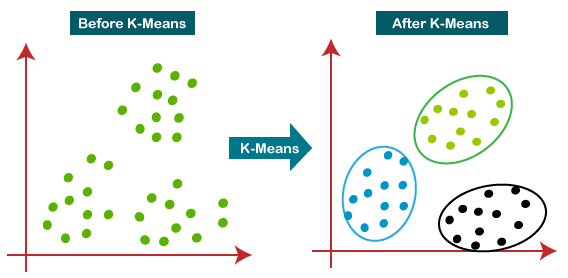

* The k-means clustering algorithm mainly performs **two tasks**: 
    * Determines the **best value for K center points** or centroids by an iterative process.
    * **Assigns each data point to its closest k-center**. Those data points which are near to the particular k-center, create a cluster.
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explatory Data Analysis

In [2]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Take a look at the continues features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Continuous Feature Analysis

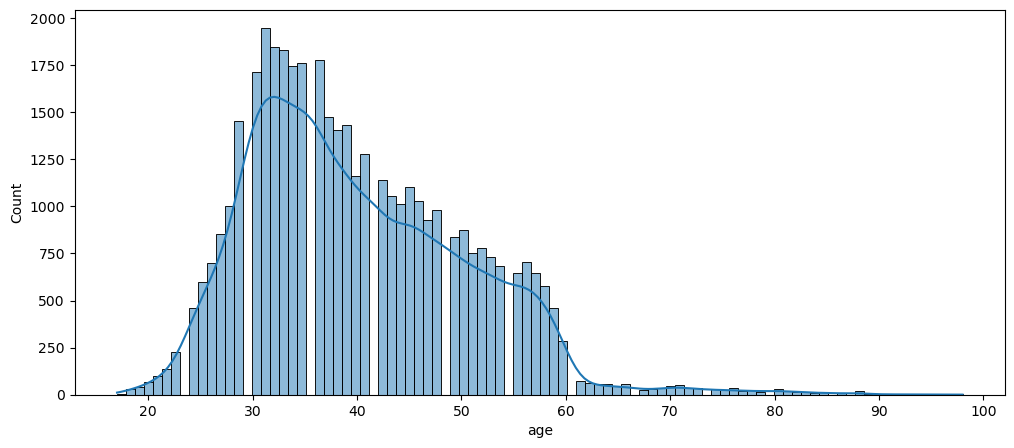

In [5]:
# Histogram of age 
plt.figure(figsize=(12,5))
sns.histplot(df, x="age", kde=True);

# use "bins" to change the number of bars (bins=50)

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** Most customers are between 30 and 40. The number of customers after 60 years old are very low.
</span>

**See which age group mostly take "loan"**

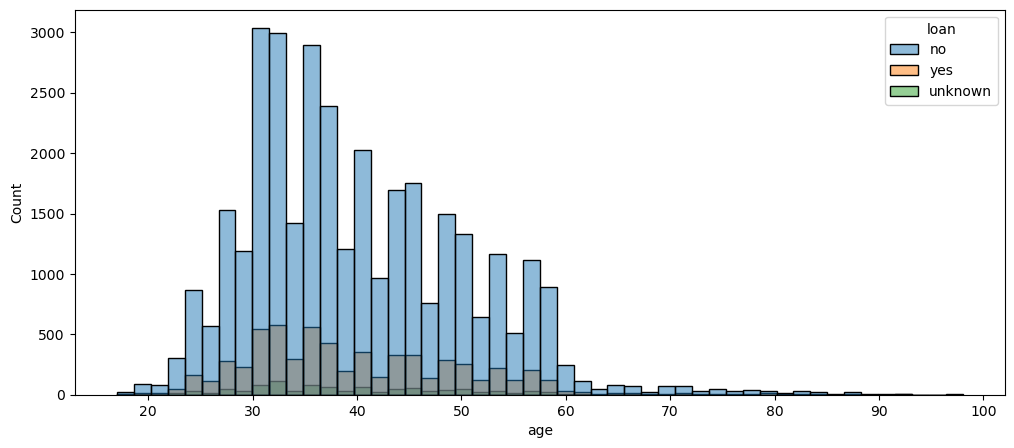

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(df, x="age", hue="loan", bins=50);

**Check "pdays": number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)**

<Axes: xlabel='pdays', ylabel='Count'>

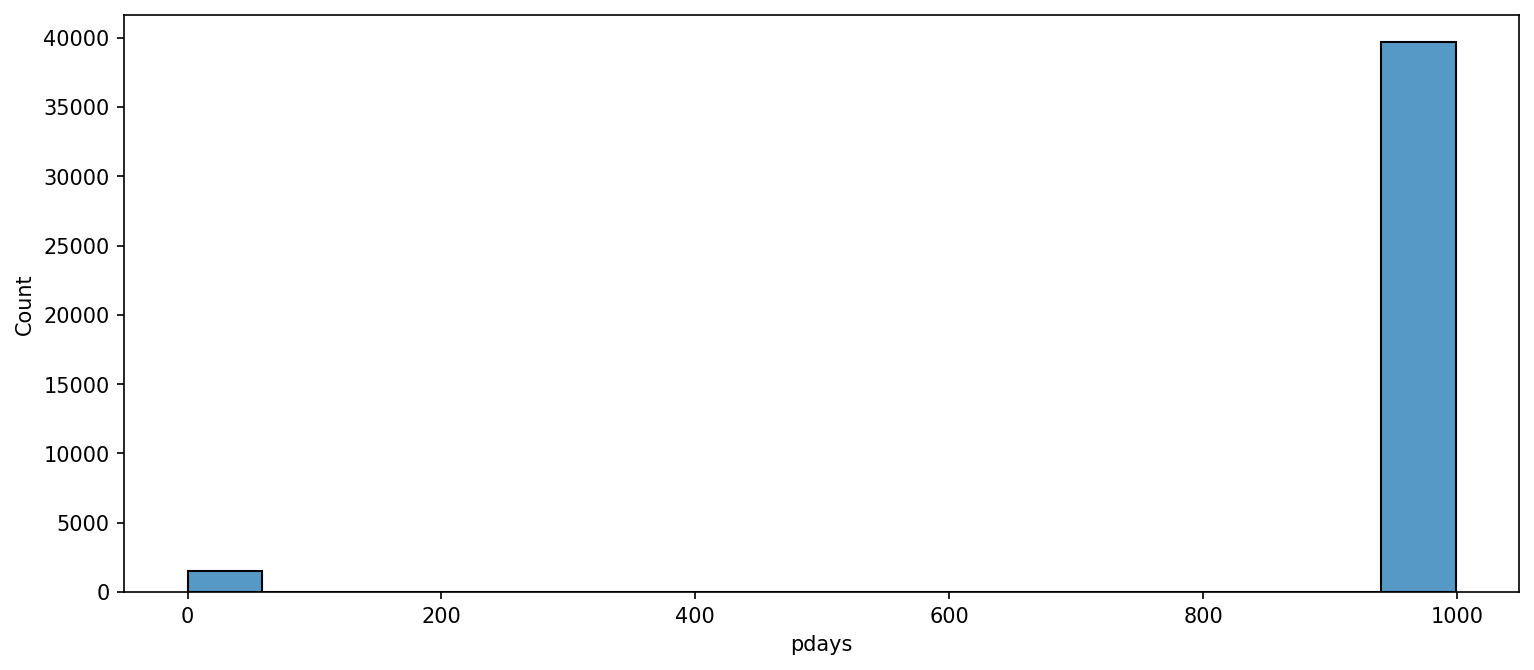

In [8]:
plt.figure(figsize=(12,5),dpi=150)
sns.histplot(df, x='pdays')

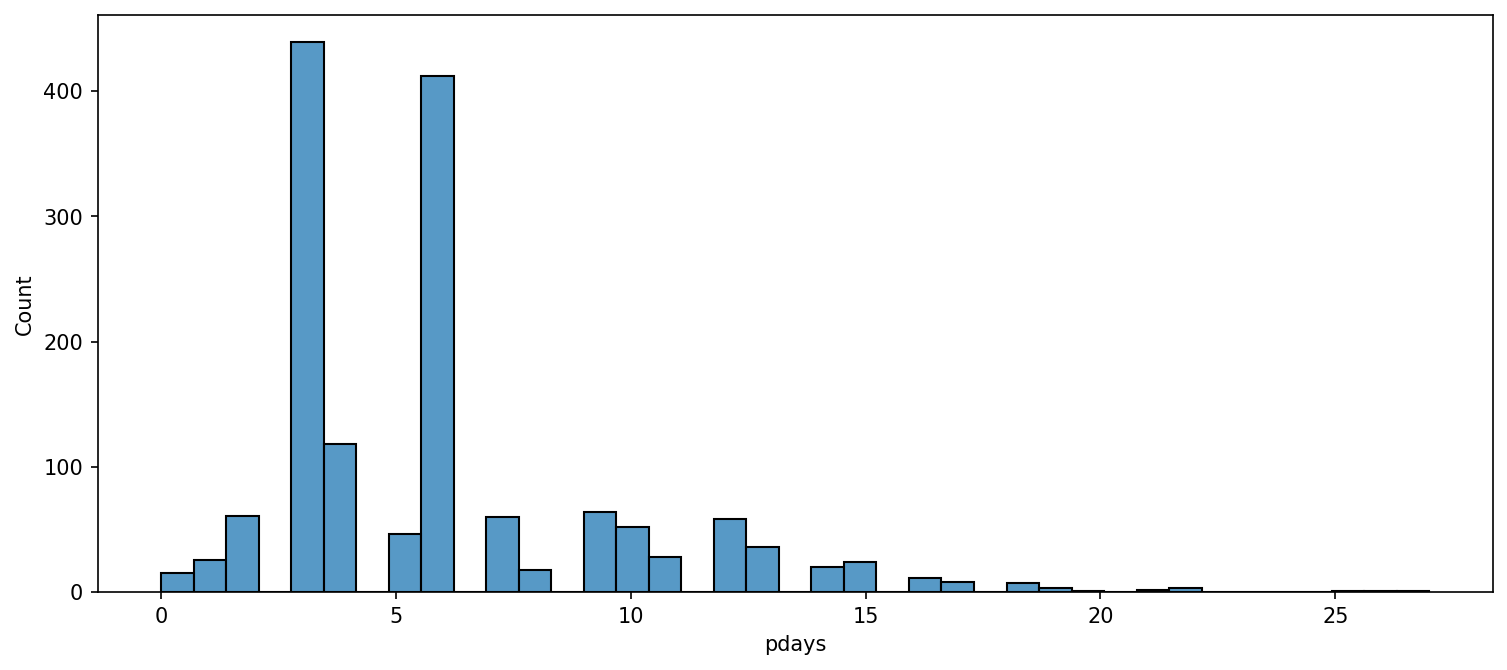

In [9]:
# Exclude 999 (not previously contacted) group and see the rest of the "pdays"

plt.figure(figsize=(12,5),dpi=150)
sns.histplot(df[df['pdays']!=999], x='pdays');

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** Most people in this group are contacted between 3 and 6 days. However, the number of people in the "999" group shows that lots of customers have not been contacted.
</span>

**Contact duration - contact with customer made, how long did call last?**


In [10]:
# Let's check values of contact column first
df["contact"].value_counts()

# To see only the name of the categories: df["contact"].unique()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

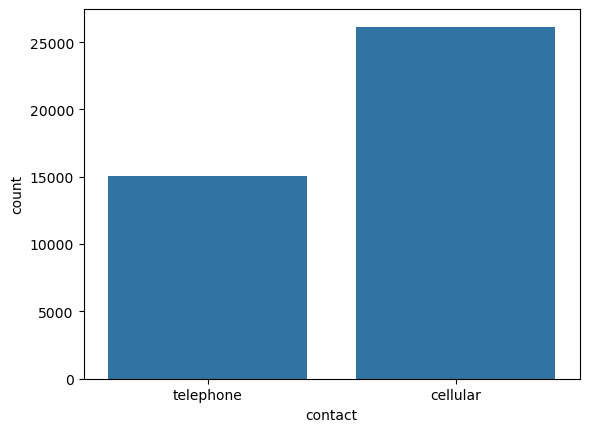

In [11]:
# To display it
sns.countplot(df, x='contact');

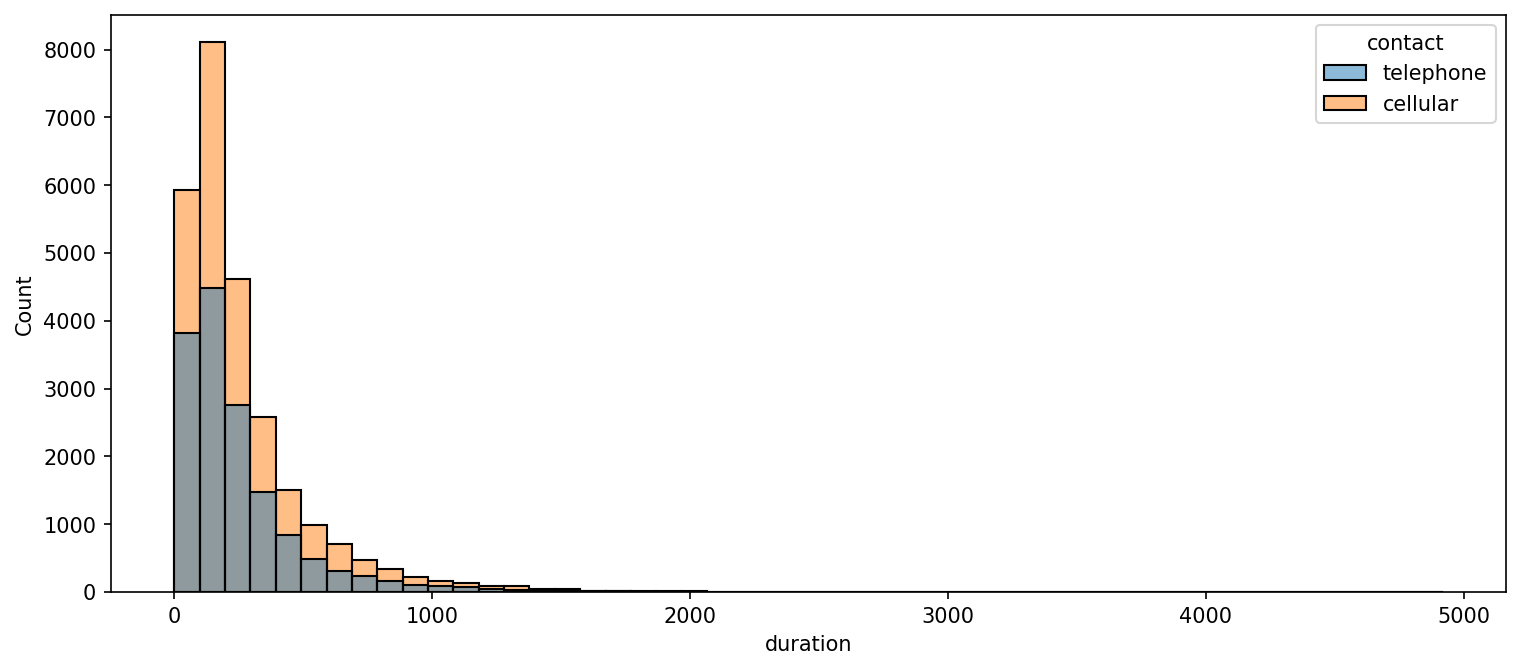

In [12]:
# Let's see the distribution od duration (in seconds) by contract

plt.figure(figsize=(12,5), dpi=150)
sns.histplot(df, x="duration", hue="contact", bins=50);

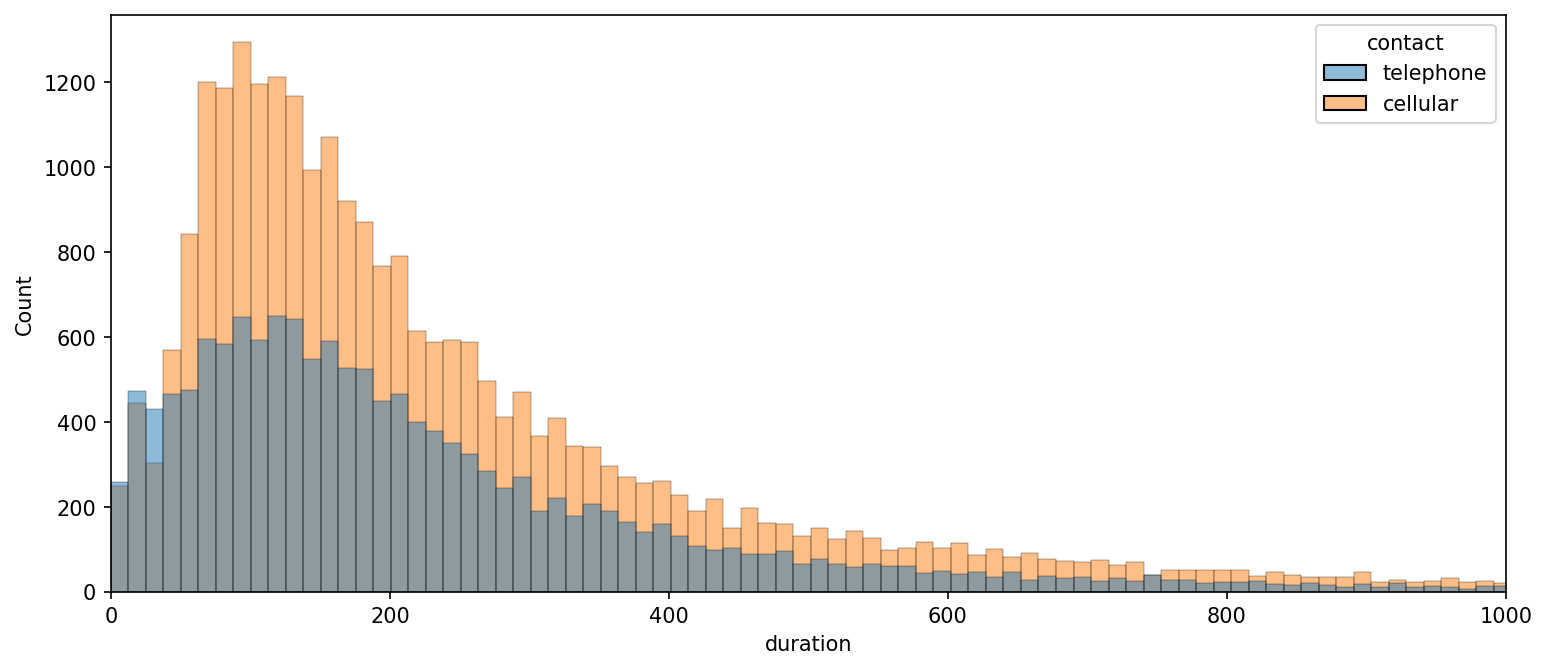

In [13]:
# To see better the duraion between 0 and 1000...
plt.figure(figsize=(12,5), dpi=150)
sns.histplot(df, x="duration", hue="contact")
plt.xlim(0,1000);

**Check previous (number of contacts performed before this campaign and for this client)by contact types using barplot**


<Axes: xlabel='previous', ylabel='count'>

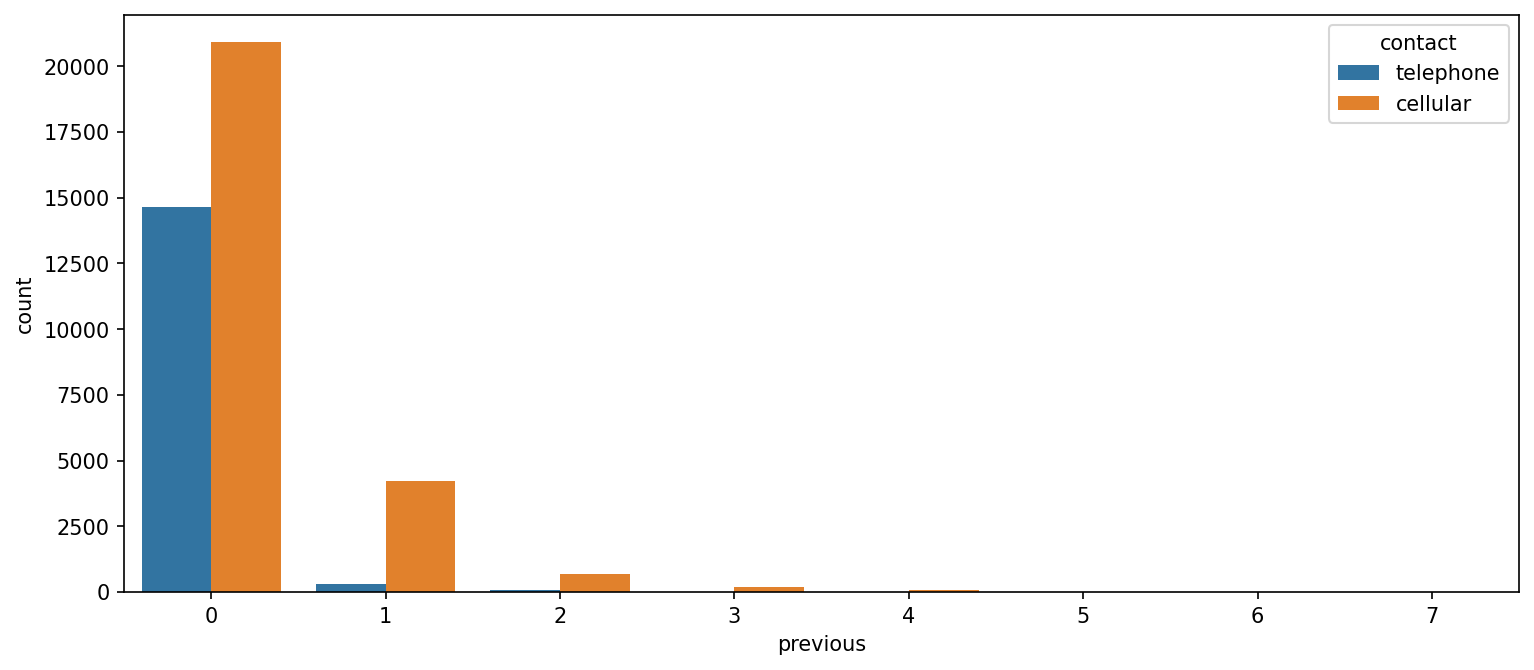

In [14]:
plt.figure(figsize=(12,5), dpi=150)
sns.countplot(df, x="previous", hue="contact")

### Categorical Features Analysis

**Let's take a look at "job" column**

In [15]:
df["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [16]:
df['job'].value_counts().index

# use this list below in "order" parameter

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

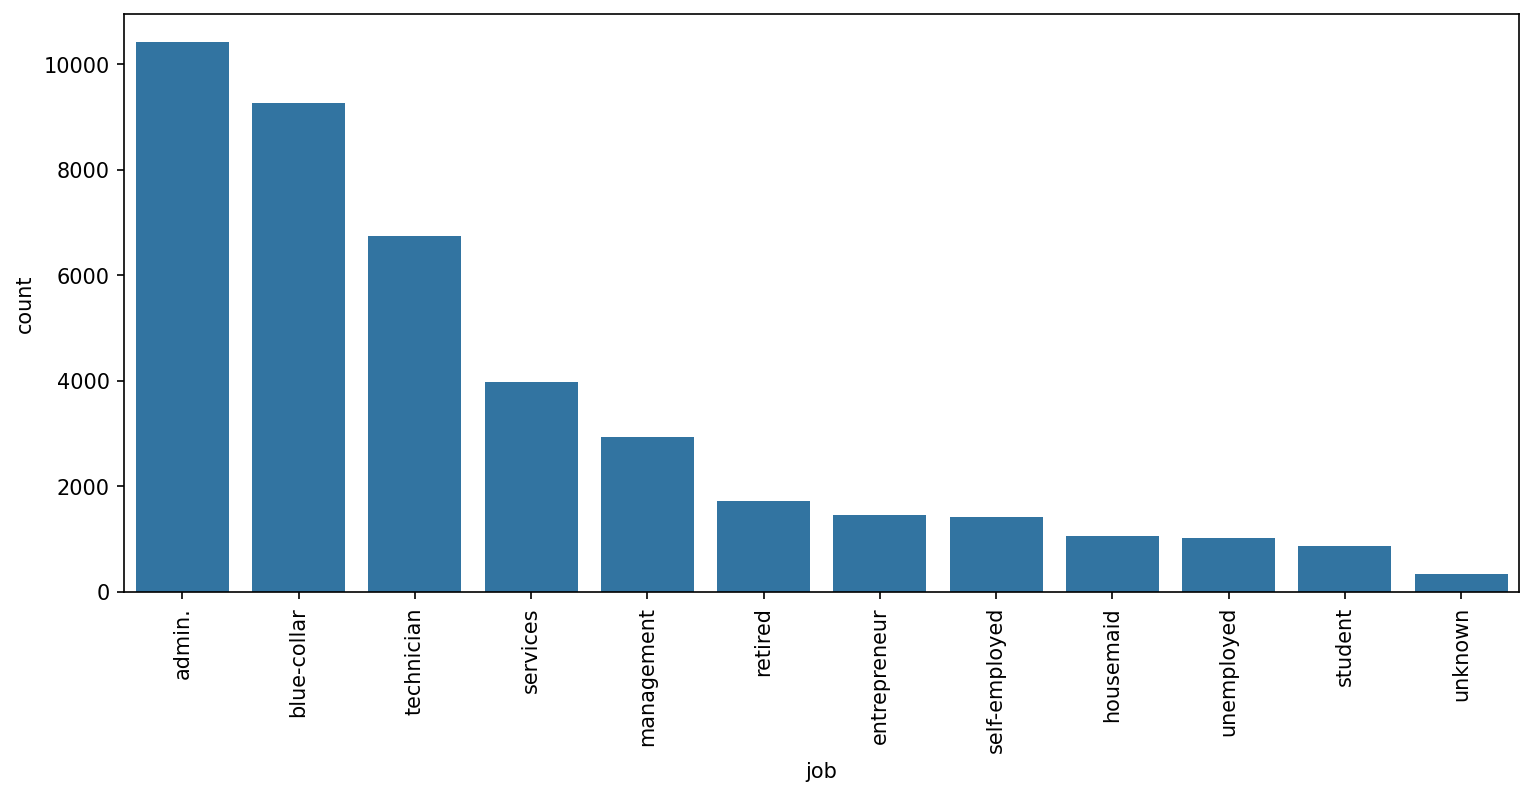

In [17]:

plt.figure(figsize=(12,5),dpi=150)
sns.countplot(data=df,x='job', order=df['job'].value_counts().index) # sort it using order parameter
plt.xticks(rotation=90);

# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

**Similarly, display "education" feature**

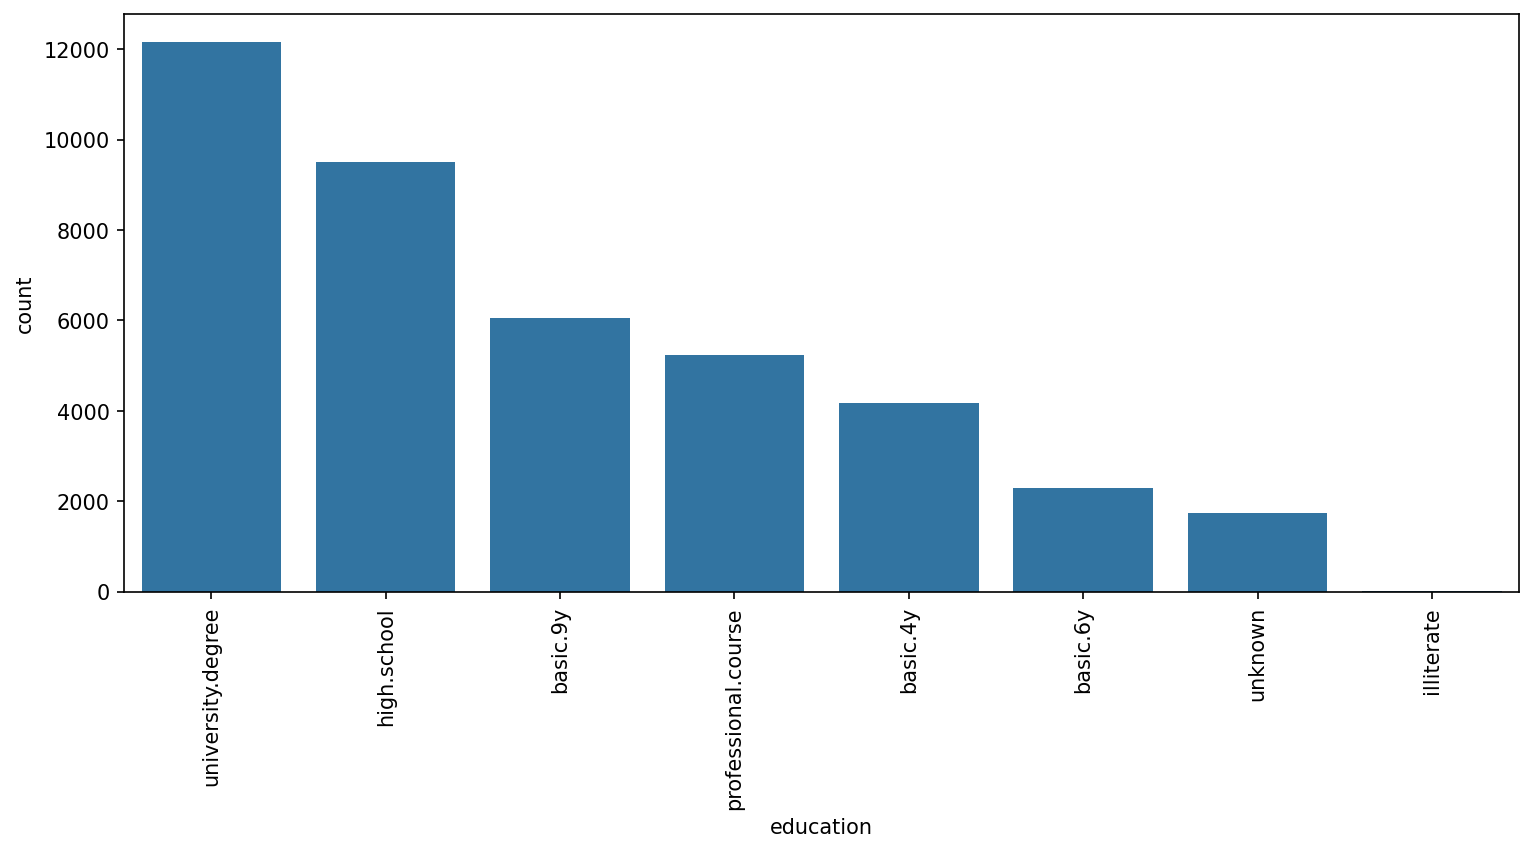

In [18]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index) # sort it using order parameter
plt.xticks(rotation=90);

**Check education by another categorical feature "default" (has credit in default?)**

In [19]:
# First, let's see default feature
df["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

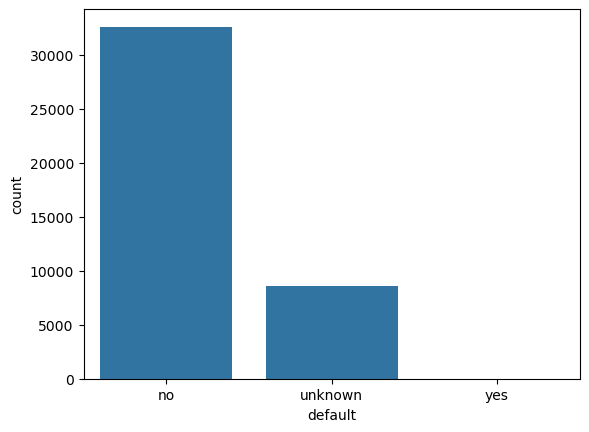

In [20]:
# Display it using countplot
sns.countplot(df, x="default");

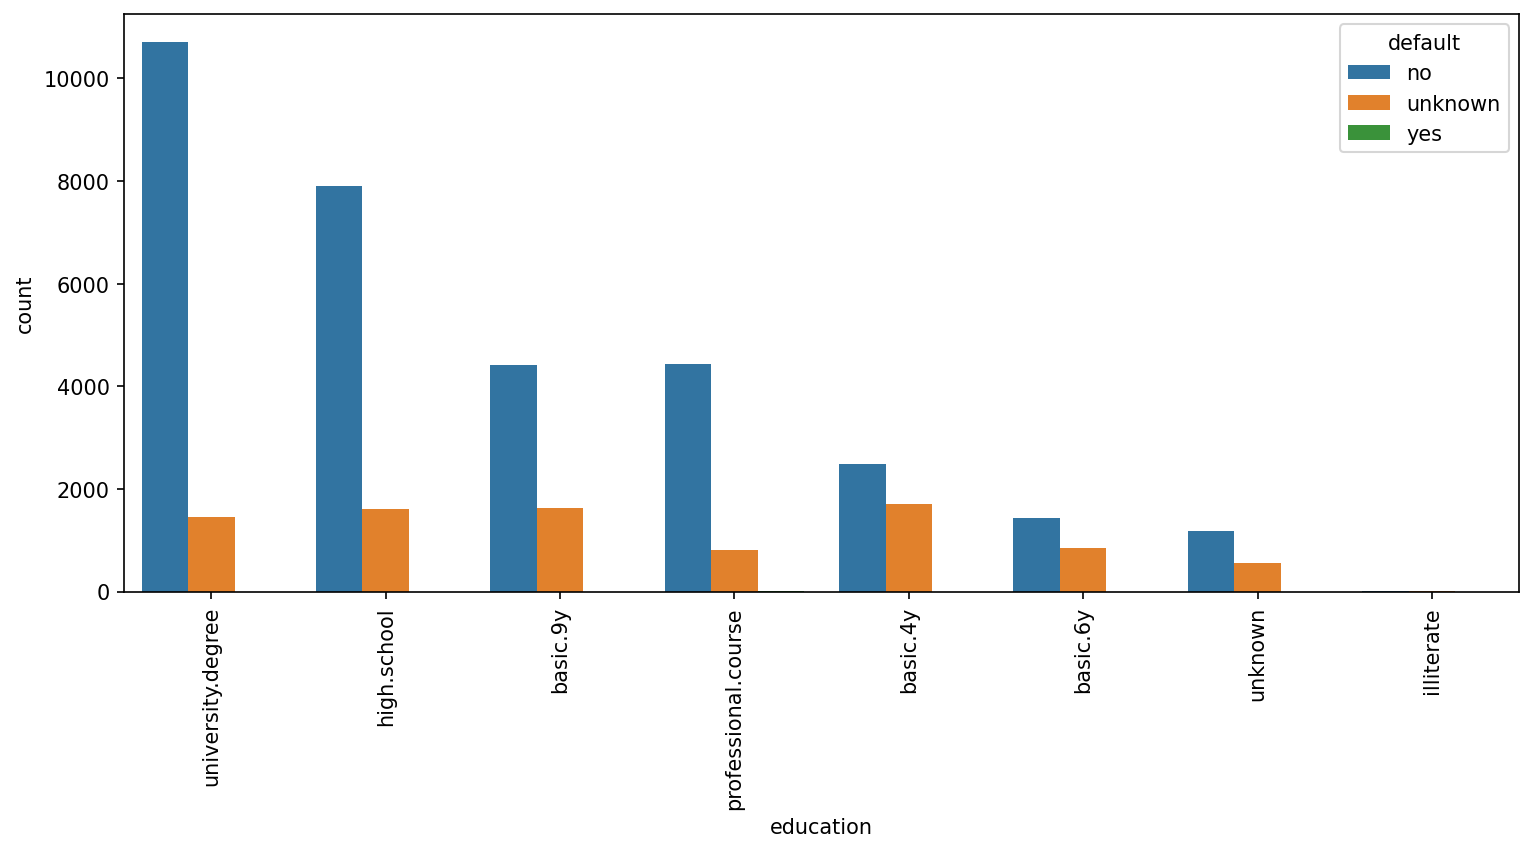

In [21]:
# education and default
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue="default") 
plt.xticks(rotation=90);

**Draw a pairplot for entire dataset.**

**Note:** It is more effective to choose some columns in pairplot, instead of displaying entire dataframe.

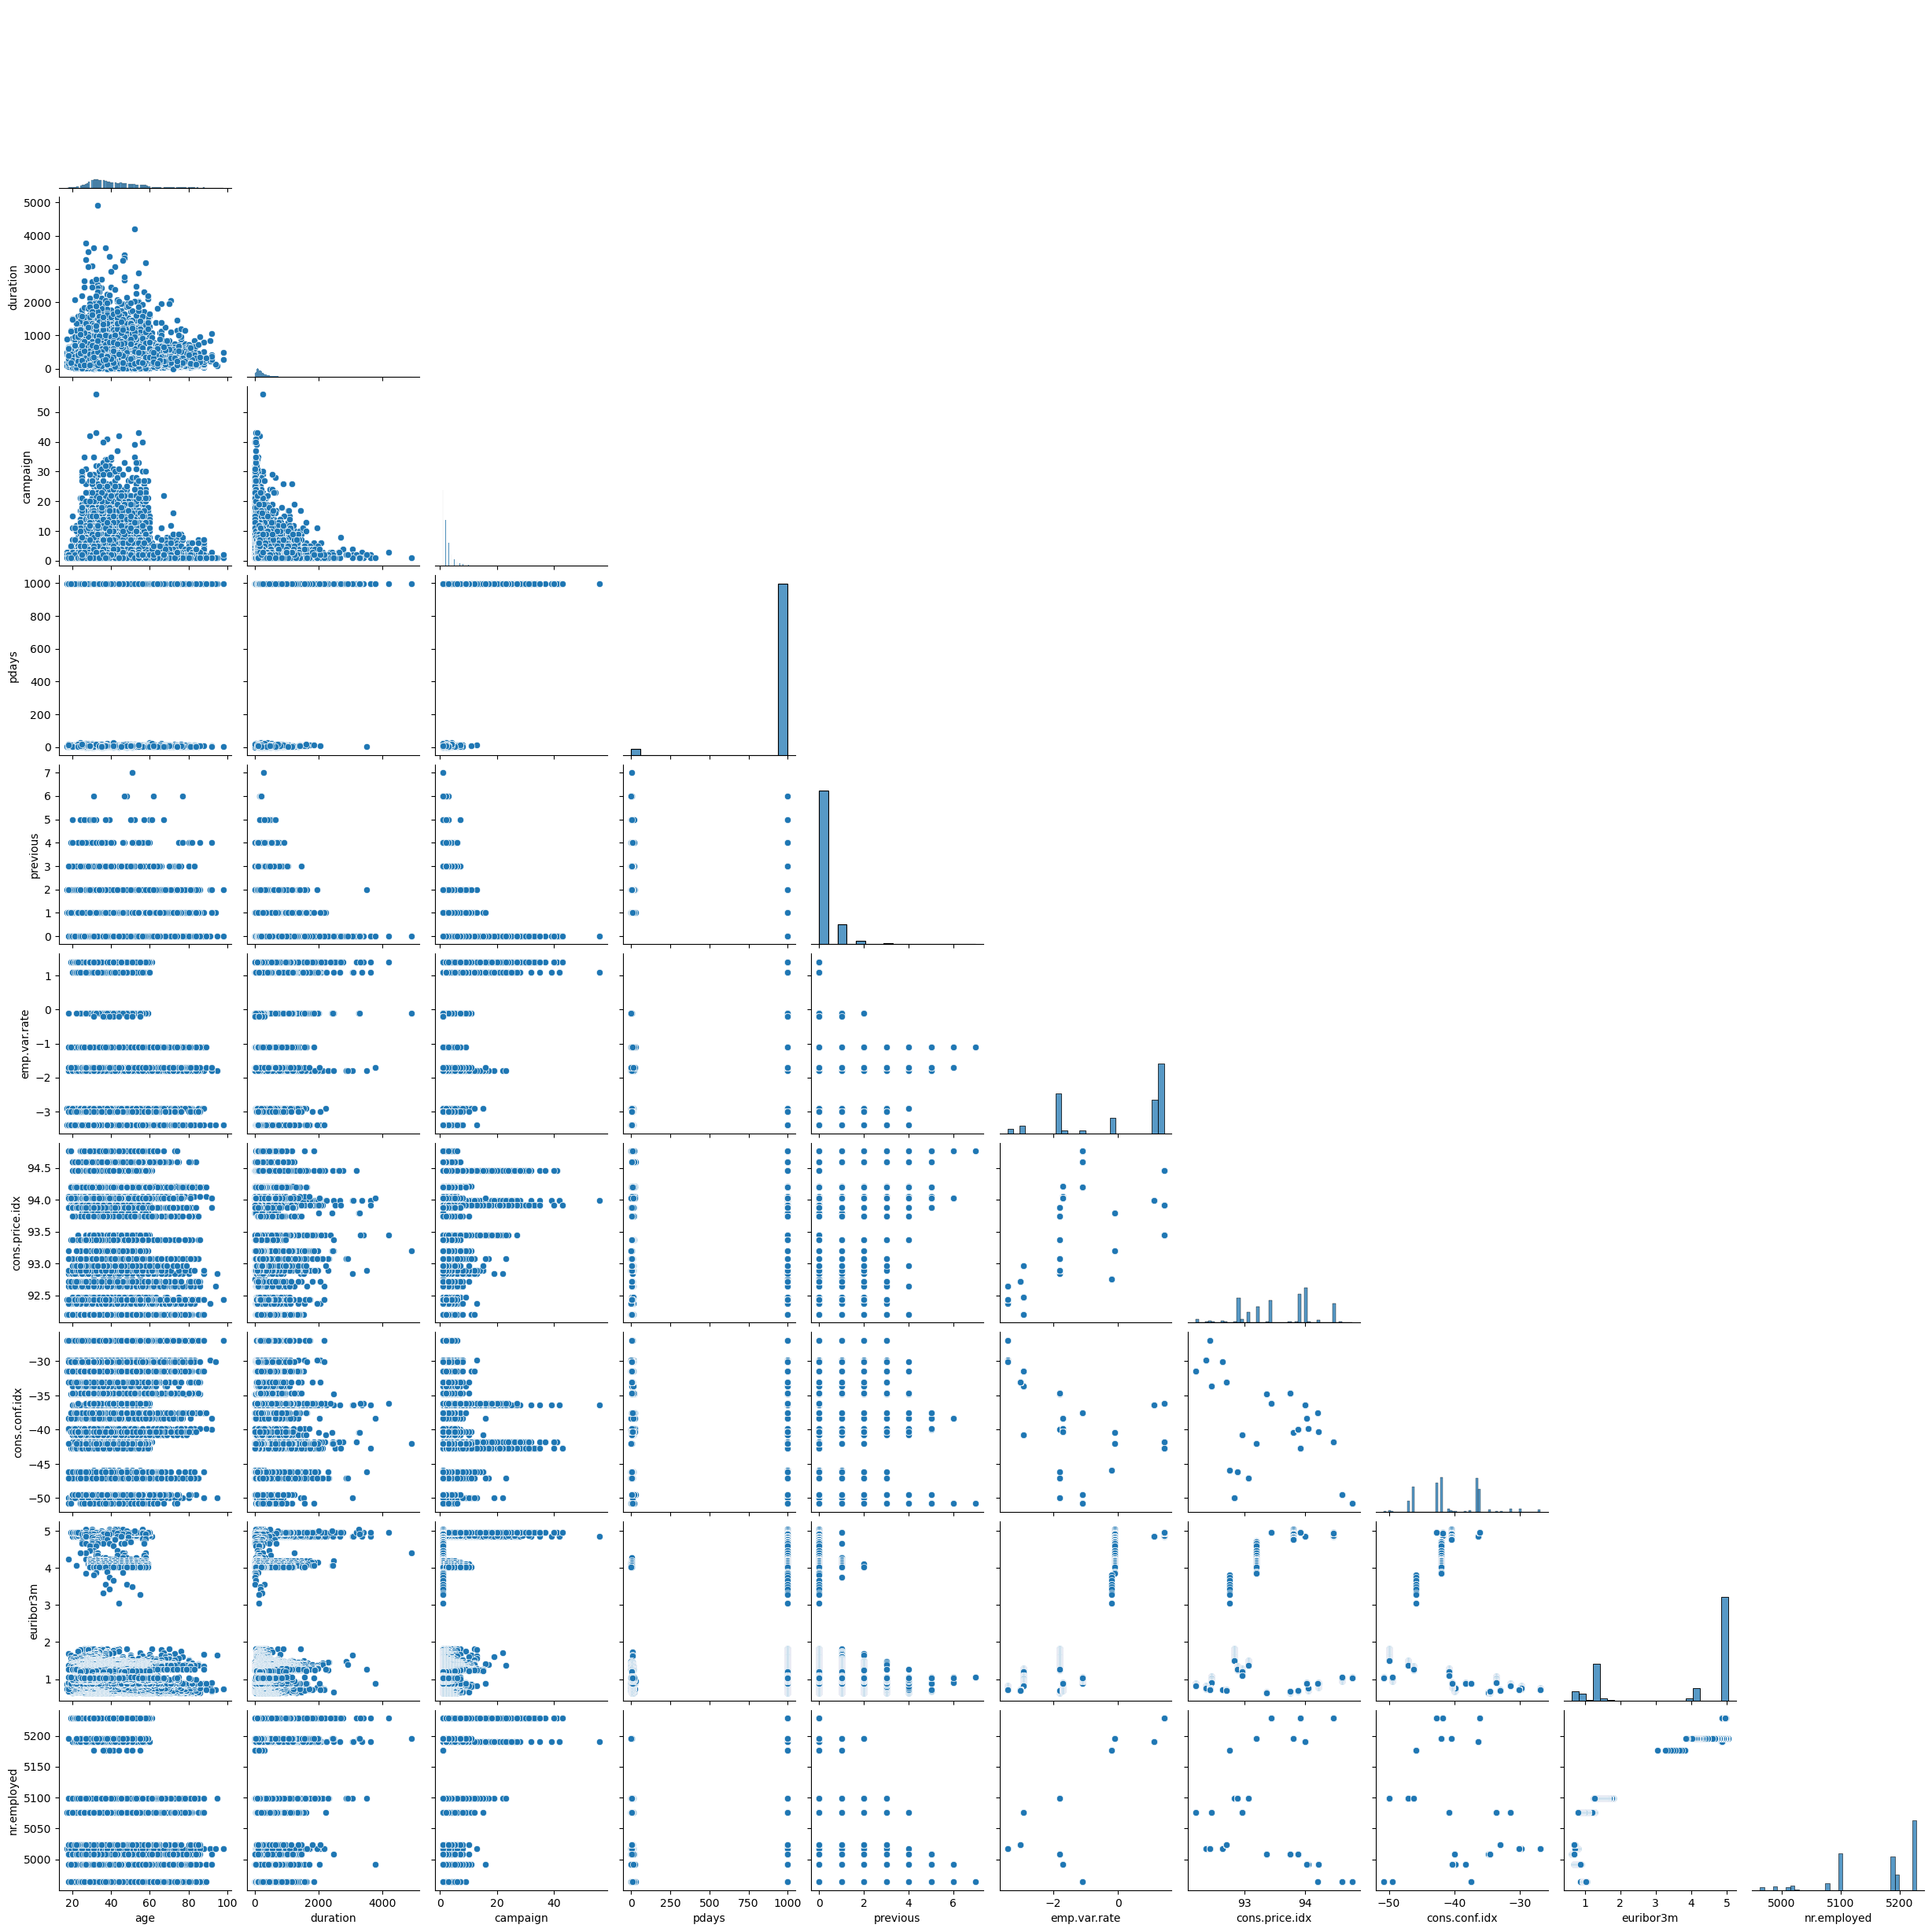

In [22]:
sns.pairplot(df, corner=True);

# Using "corner=True" we can see the half of it. Since it is symetric we do not need to see the whole.

## Clustering

### Data Preparation

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**REMINDER: There is no need to "Train | Test Split" and no need to "test" against in Unsupervised Learning!!!**

However, we need to transform categorical features into numeric ones (encoding) where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.
</span>

In [23]:
# Let's take a look at the data again

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Important:**
* There are categorical features that we need to convert into numeric ones. The model necessitates it to check the distance. 
* We will not separate the "y" label because there is no label column (Unsupervised Learning).
* We do not need to drop the first column in dummy variables because there will not be a correlation problem. Yet, it will increase the number of features.
* After get_dummies, we need to scale the data to eliminate the disproportion between numerical values (e.g, 0, 1, 261, -36, 519, etc.)
</span>

In [26]:
X = pd.get_dummies(df, dtype=int)

In [27]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [32]:
# number of columns after get_dummies
len(X.columns)

65

### Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
# Fit and transform the entire data (X,that is df with get_dummies)
# There is no "y" and "train/test" data

scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

In [38]:
from sklearn.cluster import KMeans

In [41]:
# help(KMeans)

# Default Parameters
"""
KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, 
tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
"""

"\nKMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, \ntol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')\n"

Domain knowledge is import to determine "n_clusters" value. As a starting point let's determine a low number of clusters, for example, 2 (default value is 8).

In [43]:
model = KMeans(n_clusters=2)

In [44]:
# Unlike Supervised Lesarning, we can fit and predict the model in one step using scaled data in Unsupervised Learning
cluster_labels = model.fit_predict(scaled_X)

In [45]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
len(scaled_X)

41188

In [47]:
len(cluster_labels)

41188

In [48]:
# Let's these labels to a column in X data and see the discovered clusters
X["Cluster"] = cluster_labels

In [49]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


In [50]:
# Let's see the correlation between features as weel as with Cluster (new column)
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,-0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,-0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,-0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,-0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,-0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,0.294472


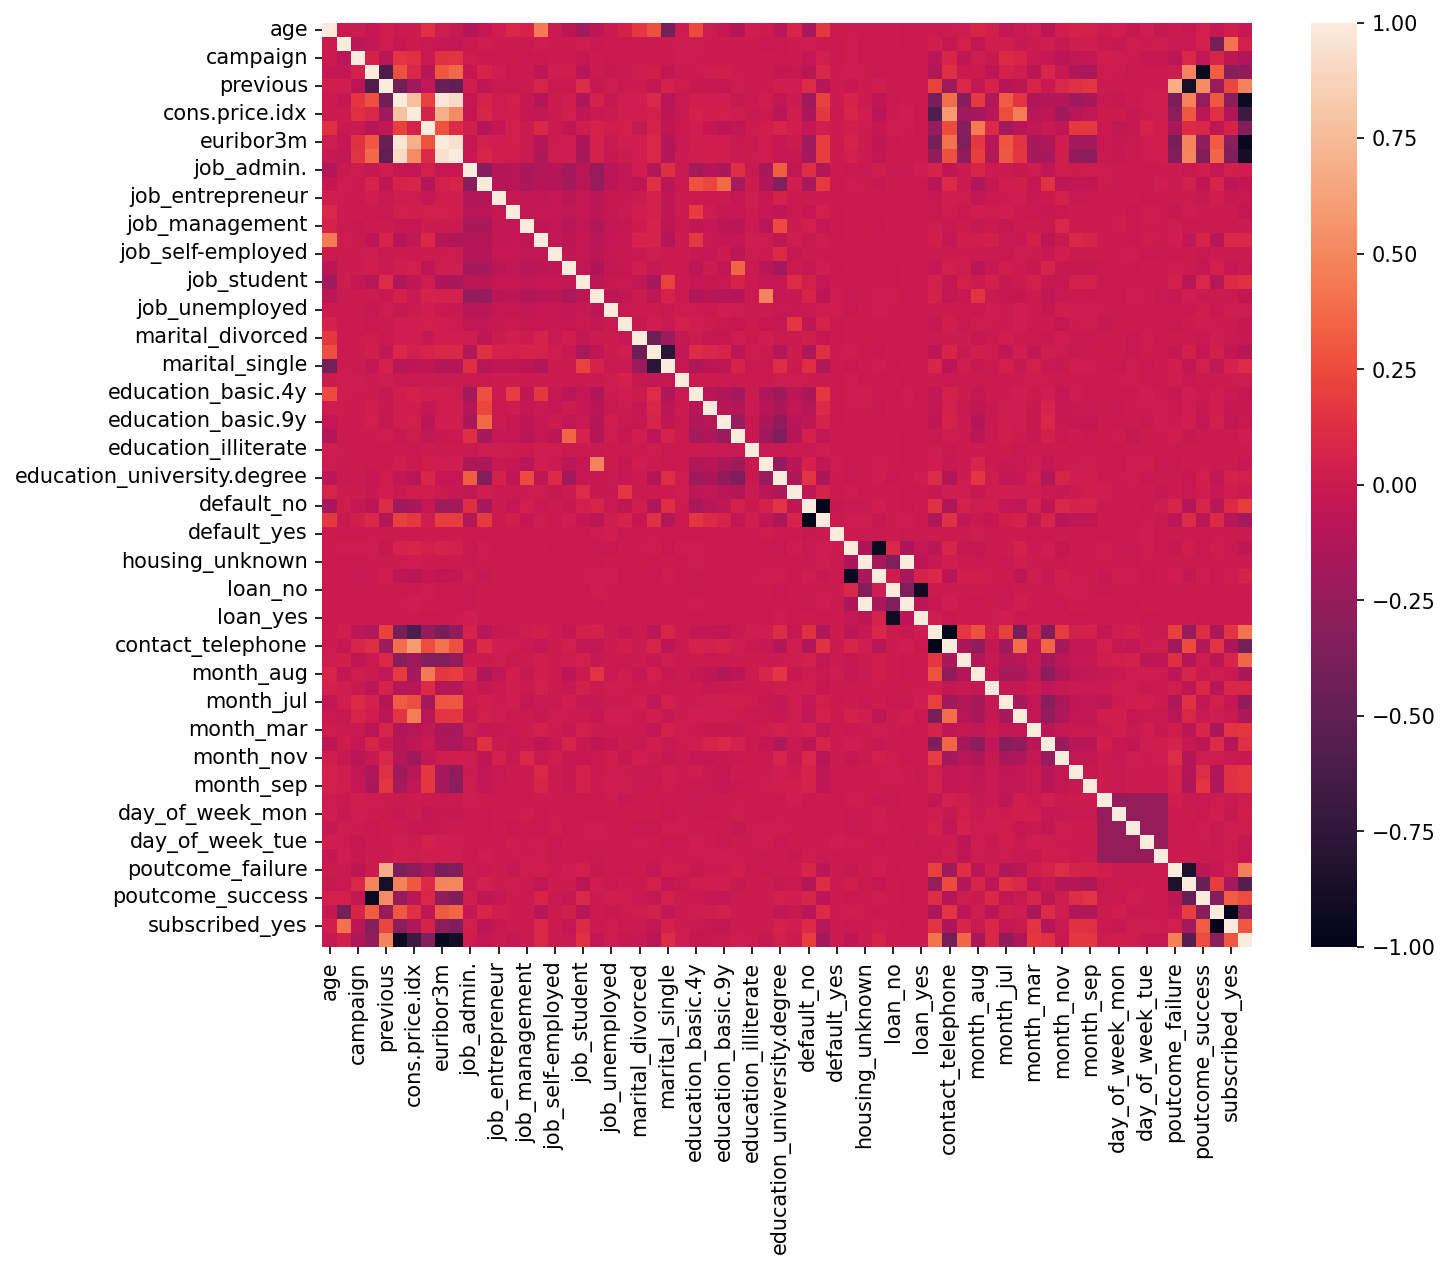

In [64]:
# Heatmap
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(X.corr());

**Correlation with Cluster column**

In [53]:
X.corr()["Cluster"].iloc[:-1].sort_values() # drop Cluster itself because it is already 1


euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: Cluster, Length: 65, dtype: float64

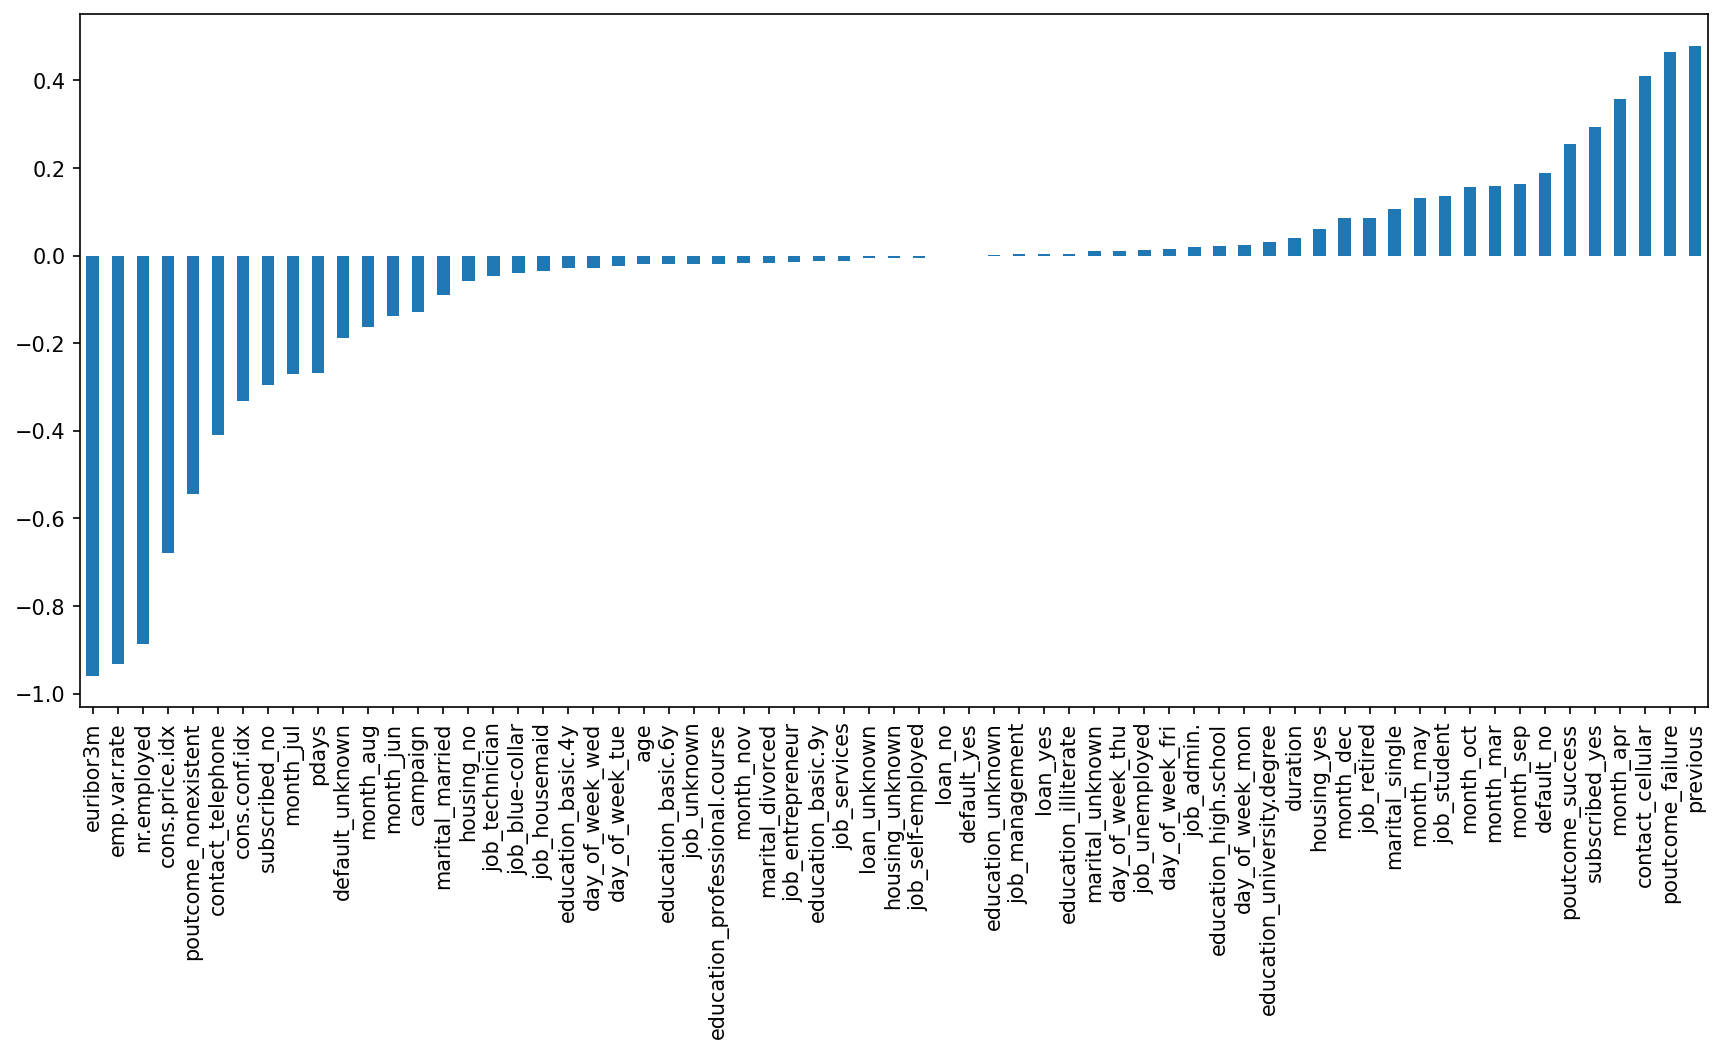

In [61]:
# Visualize it 
plt.figure(figsize=(14,6), dpi=150)
X.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.xticks(rotation=90);

<div class="alert alert-warning alert-info">
    
### <span style=" color:#bf2e98">Choosing K value

* We keep track of the Sum of the Squared Distance (SSD) value for a range of different K values.
* We then look for a K value where **rate of reduction in SSD** begins to decline.
* This signifies that adding an extra cluster (K+1) is **not** obtaining enough clarity of cluster separation to justify increasing K. Note that **SSD cannot be zero** because it means that K equals the number of points.
* We can use the **elbow method** and track the decrease in SSD where it begins to flatten out (no adding information) compared to increasing K values.
* We can also measure out this SSD in a barplot.
</span>

In [65]:
# For loop for elbow

ssd = []  # different Sum of the squared distance

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

In [66]:
# Check where ssd drops dramatically or slowly
ssd

[2469792.4571073237,
 2370416.297653081,
 2286937.035063539,
 2287771.485301149,
 2194435.062995149,
 2119972.5315599395,
 2071487.2936001294,
 2081387.2321549763]

In [71]:
# See the difference between each ssd point
pd.Series(ssd).diff()

# The index here does not show K values

0             NaN
1   -99376.159454
2   -83479.262590
3      834.450238
4   -93336.422306
5   -74462.531435
6   -48485.237960
7     9899.938555
dtype: float64

<Axes: >

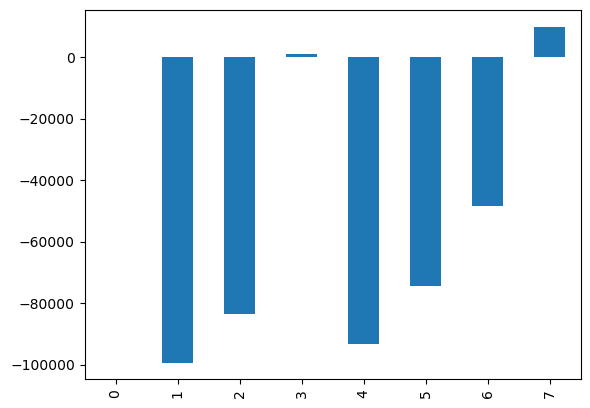

In [72]:
pd.Series(ssd).diff().plot(kind='bar')

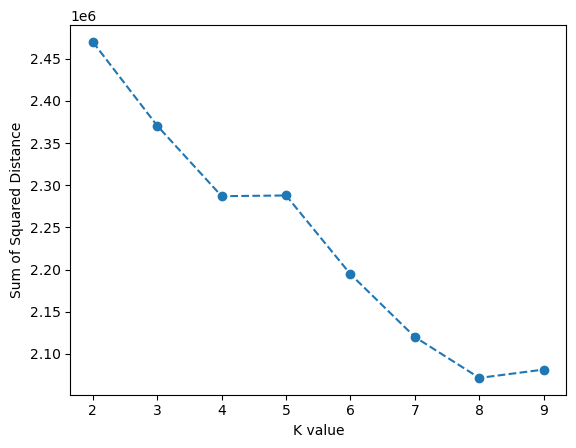

In [69]:
plt.plot(range(2,10), ssd, "o--")
plt.xlabel("K value")
plt.ylabel("Sum of Squared Distance");